#                                              Laboratorio 1: 
# FUNDAMENTOS DE APRENDIZAJE PROFUNDO CON REDES NEURONALES 

- Nombre: Juan Pablo Rojas
- RUN: 19.237.546-0
- Profesor: Gonzalo Acuña
- Ayudante: Tomás Child

El objetivo de este laborario es implementar un perceptrón simple, dando salidas en base a su función de activacion y
el ajuste de sus pesos.
El perceptron debe ser implementado para compuertas AND, OR y XOR, entrenandolo con sus respectivas tabla de verdad y luego validarlo con entradas de tamaño 4. 
Por ultimo se presenta un archivo denominado letter.csv que consiste en la clasisicación de letras "o" y "l" respecto a su ancho y largo, el objetivo es entrenar el perceptron con estos datos, de modo de ser capás de reconocer las letras. Además para lo mencionado anteriormente, se buscar graficar el comportamiento del error en el entrenamiento del perceptron, y concluir respecto a los resultados obtenidos.

# Actividades:

#### Actividad 1: Implementar   un   perceptrón   simple   en   Python   utilizando   Jupyter   Notebook.   Este   debe  entregar   una   salida   respecto   a   una   entrada   según   su   función   de   activación   y   ajustar  sus pesos en cada iteración según corresponda. 

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Clase "Perceptron", correspondiente al perceptron simple modelado por Frank Rosenblatt:
class Perceptron:
    
    #Constructor:
    #Parametro: iteraciones, correspondientes a numero de iteraciones de entrenamiento.
    #Parametro: tasa_aprendizaje, correspondiente a la tasa de aprendizaje del perceptron.
    def __init__(self, iteraciones, tasa_aprendizaje):
        self.tasa_aprendizaje = tasa_aprendizaje
        self.iteraciones = iteraciones
        # Array que guarda el numero de errores obtenidos por cada iteracion, con el objetivo de ser graficado.
        # Actividad 4
        self.numero_de_errores = []

    
    
    # Metodo: entrenar
    # Parametro: X, correspondiente al arreglo de valores [medida1,medida2].
    # Parametro: y, correspondiente al arreglo de valores yi (letra o o l).
    # X e y son coincidentes respecto al orden del dataset, ya que fueron obtenidos mediante separación
    # de datos respecto a las columnas para entrenar el perceptron de forma adecuada.
    def entrenar(self, X, y):
        #Vetor de pesos: 1 + n° de columnas de la entrada.
        #La unidad extra es debido a la adición de w0 de la funcion de activación
        #El vector representa: W0,W1,W2,...,Wn
        self.pesos = np.random.rand(1 + X.shape[1])
        
        #Iteracion principal en base al numero de iteraciones, por cada una de ellas se recolectara el
        #numero de errores obtenidos por cada fila de valores del dataset.
        for n in range(self.iteraciones):
            errores = 0
            #Iteración interna de entrenamiento por cada fila del dataset compuesta por:
            #[medida1, medida2](guardada en x) y letra asociada "o"/"l", que son representadas por -1/1(ajustando dataset)
            #con la funcion zip se itera en un Array de la forma(caso letters.csv) [[[medida1,medida2],o],..., [[medida1,medida2],l]]
            for xi, valor_real in zip(X, y):
                delta_W_ = self.actualizar_pesos(valor_real,xi)
                #Si delta_W es distinto de 0, quiere decir que se produjo un error, es decir la diferencia entre
                #valor real y valor de activacion fue distinto de cero. Por lo tanto, se cuenta como error.
                if(delta_W_ != 0.0):
                    errores+=1
            #se agrega al array atributo la cantidad de errores obtenidos por esta iteracion.
            self.numero_de_errores.append(errores)
        return self
          
    # Método: Actualizar pesos.
    # Parámetro: valor_real, correspondiente a un valor yi del array de valores esperados y.
    # Parámetro: xi, correspondiente a un valor [medida1, medida2] del arreglo de valores X.
    def actualizar_pesos(self,valor_real,xi):
        #Delta_W, definido como η * (Valor_real - Valor_activación) * xi.
        delta_W_ini = self.tasa_aprendizaje*(valor_real - self.f_activacion(xi)) 
        delta_W = delta_W_ini*xi
        self.pesos[1:] += delta_W
        #Actualizacion de el peso correspondiente a w0 con x0 = 1.
        self.pesos[0] += delta_W_ini * 1
        return delta_W_ini
        
    # Método: f_activacion, dada la operacion
    # Parámetro: X, correspondiente al arreglo de valores [medida1,medida2].
    # El valor de alpha es calculado multiplicando el array-fila(X) por el array-columna(pesos)
    # Como se indica en la presentación "Perceptron" que provee el curso.
    def f_activacion(self, X):
        alpha = np.dot(X, self.pesos[1:]) + self.pesos[0]
        valor = np.where(alpha >= 0.0, 1, -1)
        return valor
    
    # Método: predict_compuertas
    # Parámetro: X, correspondiente a un arreglo de entrada con 1 y -1 de tamaño n.
    # Esta funcion es usada para obtener el resultado de operaciones lógicas de entradas
    # de tamaño n. Los valores son agrupados de a dos y se le aplica la respectiva función
    # de activación de la cual se obtendra el resultado lógico.
    # Cabe destacar que el perceptron debe estar entrenado con la respectiva compuerta lógica.
    def predict_compuertas(self,X):
        value = X[0]
        for n in range(len(X)-1):
            arrayAux = [value]
            x_sig = X[n+1]
            arrayAux.append(x_sig)
            value = self.f_activacion(arrayAux)
        return value
            

#### Actividad 2: Probar   el   perceptrón   implementado   para   una   compuerta   lógica   AND,   OR   y   XOR   con  una entrada de tamaño 4.
    
- Para el correcto funcionamiento del perceptrón los 0 se consideran como -1.
- El array X corresponde a las combinaciones logicas -1 -1|-1 1|1 -1|1 1
- El array y corresponde al resultado de las combinaciones logicas de X, respetando el orden.

In [69]:
#_________Entrenamiento de perceptrones________
#______________Compuerta AND__________________
X_AND = np.array([[-1,-1],[1,-1],[-1,1],[1,1]])
y_AND = np.array([-1,-1,-1,1])
#Entrenamiento del perceptron con compuerta AND
perceptron_AND = Perceptron(50,0.1)
perceptron_AND.entrenar(X_AND,y_AND)
#_____________________________________________

#______________Compuerta OR___________________
X_OR = np.array([[-1,-1],[1,-1],[-1,1],[1,1]])
y_OR = np.array([-1,1,1,1])
#Entrenamiento del perceptron con compuerta OR
perceptron_OR = Perceptron(50,0.1)
perceptron_OR.entrenar(X_OR,y_OR)
#____________________________________________
#Compuerta XOR
X_XOR = np.array([[-1,-1],[1,-1],[-1,1],[1,1]])
y_XOR = np.array([-1,1,1,-1])
#Entrenamiento del perceptron con compuerta XOR
perceptron_XOR = Perceptron(50,0.1)
perceptron_XOR.entrenar(X_XOR,y_XOR)



<__main__.Perceptron instance at 0x7fdecec63ea8>

In [70]:
#_______________Estas entradas pueden ser editadas a voluntad____________
#__________________________________________
#___________________AND____________________
entrada_AND = [1,1,1,-1]
#__________________________________________
#___________________OR_____________________
entrada_OR = [1,1,1,-1]
#__________________________________________
#__________________XOR_____________________
entrada_XOR = [1,1,1,-1]
#__________________________________________

#________Resultado de entradas lógicas_____
print("Resultado AND: " + str(perceptron_AND.predict_compuertas(entrada_AND)))
print("Resultado OR: " + str(perceptron_OR.predict_compuertas(entrada_OR)))
print("Resultado XOR: " + str(perceptron_XOR.predict_compuertas(entrada_XOR)))


Resultado AND: -1
Resultado OR: 1
Resultado XOR: 1


#### Actividad 4(adelanto por conveniencia): Calcular   el   error   obtenido   durante   el   entrenamiento   del   perceptrón   y   expresarlo   a  través de un gráfico. 

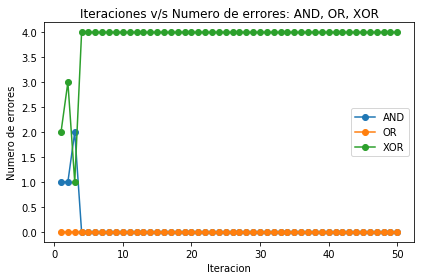

In [71]:
plt.plot(range(1,len(perceptron_AND.numero_de_errores) + 1), perceptron_AND.numero_de_errores, marker= "o", label = "AND")
plt.plot(range(1,len(perceptron_OR.numero_de_errores) + 1), perceptron_OR.numero_de_errores, marker= "o", label = "OR")
plt.plot(range(1,len(perceptron_XOR.numero_de_errores) + 1), perceptron_XOR.numero_de_errores, marker= "o", label = "XOR")
plt.title("Iteraciones v/s Numero de errores: AND, OR, XOR")
plt.xlabel("Iteracion")
plt.ylabel("Numero de errores")
plt.legend(loc = "center right")
plt.tight_layout()
plt.show()

#### Actividad 3: Probar   el   perceptrón   implementado   para   clasificar   las   entradas   del   dataset  “letters.csv”   determinando   a   qué   letra   corresponde   cada   entrada   según   las  características recibidas. 

In [72]:
# Lectura del dataset letters.csv a través de panda.
data_letters = pd.read_csv("letters.csv",header=None)
data_letters.head()

,0,1,2
0,0.0,0.3,o
1,0.3,0.0,o
2,0.6,0.2,o
3,0.5,0.1,o
4,0.2,0.4,o


In [128]:
# Se seleccionan los valores de las columnas 0 y 1, correspondiente a ancho y alto.
X = data_letters.iloc[:, [0, 1]].values
# Se seleccionan los valores de la columna 2, correspondiente al valor real de la letra segun la medida.
y = data_letters.iloc[:, 2].values

# Se ajusta y dando valor -1 si es "o" y 1 si es "l"
y= np.where(y == "o", -1, 1)
#_______________Entrenamiento perceptron_______________________
perceptron_letters = Perceptron(50, 0.1)
perceptron_letters.entrenar(X,y)

<__main__.Perceptron instance at 0x7fdece9d0758>

#### Actividad 4: Calcular   el   error   obtenido   durante   el   entrenamiento   del   perceptrón   y   expresarlo   a  través de un gráfico. 

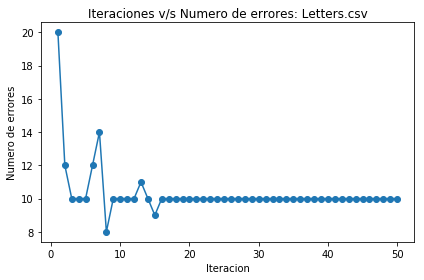

In [129]:
plt.plot(range(1,len(perceptron_letters.numero_de_errores) + 1), perceptron_letters.numero_de_errores, marker= "o")
plt.title("Iteraciones v/s Numero de errores: Letters.csv")
plt.xlabel("Iteracion")
plt.ylabel("Numero de errores")
plt.tight_layout()
plt.show()

#### Actividad 5: Analizar   los   resultados   obtenidos   y   concluir   sobre   los   resultados   obtenidos   en   las  actividades 2 y 3.



En la primera actividad, donde se grafican los errores obtenidos para el entrenamiento del perceptron con compuertas AND, OR y XOR, se puede verificar que la cantidad de errores igual a 0 solo ocurre en el entrenamiento con compuertas AND y OR, esto debido a que el perceptron puede ser correctamente entrenado al ser linealmente separables, caso contrario con XOR donde este no es linealmente separable, se producen errores indefinidamente. Lo anterior se puede apreciar en los siguientes gráficos:


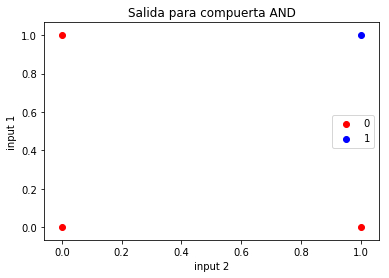

In [130]:
AND = np.array([[0,0,0],[1,0,0],[0,1,0],[1,1,1]])
OR = np.array([[0,0,0],[1,0,1],[0,1,1],[1,1,1]])
XOR = np.array([[0,0,0],[1,0,1],[0,1,1],[1,1,0]])

plt.scatter(AND[:3,0],AND[:3,1],color='red',label='0')
plt.scatter(AND[3,0],AND[3,1],color='blue',label='1')
plt.ylabel("input 1")
plt.xlabel("input 2")
plt.title("Salida para compuerta AND")
plt.legend(loc = "center right")
plt.show()

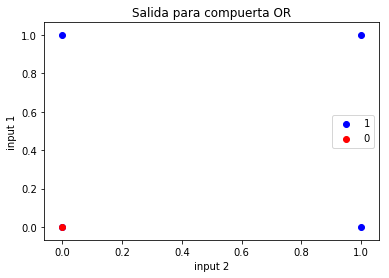

In [131]:
plt.scatter(OR[0:,0],OR[0:,1],color='blue',label='1')
plt.scatter(OR[0,0],OR[0,1],color='red',label='0')
plt.ylabel("input 1")
plt.xlabel("input 2")
plt.title("Salida para compuerta OR")
plt.legend(loc = "center right")
plt.show()

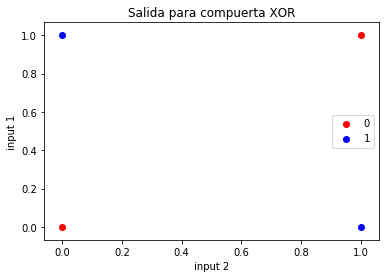

In [132]:
plt.scatter(OR[0,0],OR[0,1],color='red',label='0')
plt.scatter(OR[3,0],OR[3,1],color='red')
plt.scatter(OR[1,0],OR[1,1],color='blue')
plt.scatter(OR[2,0],OR[2,1],color='blue',label='1')
plt.ylabel("input 1")
plt.xlabel("input 2")
plt.title("Salida para compuerta XOR")
plt.legend(loc = "center right")
plt.show()

Como se puede observar AND y OR son linealmente separables para 0 y 1. Luego XOR no es linealmente separable.
Ahora bien, en el gráfico de errores del perceptron entrenado a partir de los datos de letters.csv, ocurre el mismo caso de XOR: la cantidad de errores nunca llega a ser 0, por ende se debe comprobar que no son linealmente separables a través del siguiente gráfico:

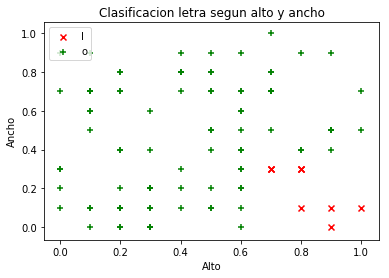

In [134]:
data_letters_l = data_letters[data_letters[2] == 'l'].values
data_letters_o = data_letters[data_letters[2] == 'o'].values

plt.scatter(data_letters_l[:,0],data_letters_l[:,1], color = 'red', marker = 'x', label = 'l')
plt.scatter(data_letters_o[:,0],data_letters_o[:,1], color = 'green', marker = '+', label = 'o')
plt.title("Clasificacion letra segun alto y ancho")
plt.xlabel("Alto")
plt.ylabel("Ancho")
plt.legend(loc = "upper left")
plt.show()

Luego se comprueba a través de la visualización de la grafica anterior que los datos de letters.csv no son linealmente separables, por lo tanto el perceptron no puede ser entrenado adecuadamente al punto de tener 0 errores.
A partir de la experiencia se comprueba que los perceptrones son adecuados sólo para clases linealmente separables, como lo fue en el caso de AND y OR.